Install miniconda, python=3.11.5, jupyter notebook, then, use notebook to install the rest, See: env231003

In [ ]:
#conda install -c conda-forge gdal=3.7.2
#restart

In [ ]:
#!pip install tensorflow==2.13.0
#!pip install tensorboard==2.13.0
#!pip install pyrsgis==0.4.1rc2
#!pip install matplotlib
#!pip install matplotlib-inline

In [ ]:
#conda install scikit-learn
#restart

In [ ]:
#conda install -c conda-forge proj


In [1]:
import platform
print('The python version is {}.'.format(platform.python_version()))

import tensorflow as tf
print('The tensorflow version is {}.'.format(tf.__version__))

from tensorboard import version
print('The tensorboard version is {}.'.format(version.VERSION))

import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

#!pip3 install pyrsgis==0.4.1rc2

import pyrsgis
print('The pyrgis version is {}.'.format(pyrsgis.__version__))

from osgeo import gdal

version_info = gdal.VersionInfo()
print(version_info)




The python version is 3.11.5.


2024-10-29 13:42:53.494936: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-29 13:42:53.549783: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-29 13:42:53.835150: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-29 13:42:53.837061: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-29 13:42:54.575942: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

The tensorflow version is 2.13.0.
The tensorboard version is 2.13.0.
The scikit-learn version is 1.2.2.
The pyrgis version is 0.4.2rc1.
3070200


In [2]:
import os

!pip list | grep h5py
!pip list | grep numpy

h5py                          3.9.0
numpy                         1.24.3


In [3]:
#%tensorflow_version 2.x
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from matplotlib import pyplot as plt

In [4]:
import os, math, random, glob, time
random.seed(2)
import numpy as np
from pyrsgis import raster
from pyrsgis.ml import imageChipsFromFile
from sklearn.utils import resample

In [6]:
import os
os.chdir('/home/janaya/Downloads')
!ls -al NewF*
!pwd


-rw-rw-r-- 1 janaya janaya 58518461 mar 14  2024 NewFeature16bit_0.tif
-rw-rw-r-- 1 janaya janaya 63968263 mar 14  2024 NewFeature16bit_10.tif
-rw-rw-r-- 1 janaya janaya 68122383 mar 14  2024 NewFeature16bit_11.tif
-rw-rw-r-- 1 janaya janaya 63522571 mar 14  2024 NewFeature16bit_12.tif
-rw-rw-r-- 1 janaya janaya 51351071 mar 14  2024 NewFeature16bit_13.tif
-rw-rw-r-- 1 janaya janaya 17158707 mar 14  2024 NewFeature16bit_14.tif
-rw-rw-r-- 1 janaya janaya 66929033 mar 14  2024 NewFeature16bit_15.tif
-rw-rw-r-- 1 janaya janaya 64855955 mar 14  2024 NewFeature16bit_16.tif
-rw-rw-r-- 1 janaya janaya 55774061 mar 14  2024 NewFeature16bit_17.tif
-rw-rw-r-- 1 janaya janaya 62610877 mar 14  2024 NewFeature16bit_18.tif
-rw-rw-r-- 1 janaya janaya 61791261 mar 14  2024 NewFeature16bit_19.tif
-rw-rw-r-- 1 janaya janaya 63645937 mar 14  2024 NewFeature16bit_1.tif
-rw-rw-r-- 1 janaya janaya 38884395 mar 14  2024 NewFeature16bit_20.tif
-rw-rw-r-- 1 janaya janaya   452181 mar 14  2024 NewFeature16bit_2

In [7]:
import os
# define the file names

feature_file = '/home/janaya/Downloads/FeatureSyntheticCube_240216.tif'
label_file = '/home/janaya/Downloads/LabelSyntheticCube_240216.tif'
featuresNewImage = '/home/janaya/Downloads/NewFeature16bit_0.tif'
os.chdir('/home/janaya/Downloads')

#you may need to edit a *.py file following the next github directions
#/net/home/janaya/.conda/envs/BurnedArea/lib/python3.8/site-packages/pyrsgis/ml/__init__.py
#https://github.com/PratyushTripathy/Landsat-Classification-Using-Convolution-Neural-Network/issues/2

In [8]:
FeatureFileProperties = gdal.Open(feature_file)
FeatureFileProperties.RasterCount
FeatureFilePropertiesBand = FeatureFileProperties.GetRasterBand(1)
FeatureFilePropertiesBand.DataType

#unknown 0
#8-byte  1
#Uint16  2
#Int16   3  WITH SIGN
#UInt32  4
#Int32   5


2

In [9]:
FeatureFileProperties = gdal.Open(label_file)
FeatureFileProperties.RasterCount
FeatureFilePropertiesBand = FeatureFileProperties.GetRasterBand(1)
FeatureFilePropertiesBand.DataType

#unknown 0
#8-byte  1
#Uint16  2
#Int16   3 WITH SIGN
#UInt32  4
#Int32   5


2

In [10]:
FeatureFileProperties = gdal.Open(featuresNewImage)
FeatureFileProperties.RasterCount
FeatureFilePropertiesBand = FeatureFileProperties.GetRasterBand(1)
FeatureFilePropertiesBand.DataType

#unknown 0
#8-byte  1
#Uint16  2
#Int16   3  WITH SIGN
#UInt32  4
#Int32   5


2

In [11]:
#at k or size = 15 knossos kill the process.
features = imageChipsFromFile(feature_file, x_size=9, y_size=9)# modify kSize at the end of the script

In [12]:
features = np.rollaxis(features, 3, 1)

In [13]:
# read the label file and reshape it
ds, labels = raster.read(label_file)
labels = labels.flatten()

In [14]:
# check for irrelevant values (we are interested in 1s and non-1s)
labels = (labels == 1).astype(int)

In [15]:
# print basic details
print('Input features shape:', features.shape)
print('Input labels shape:', labels.shape)
print('Values in input features, min: %d & max: %d' % (features.min(), features.max()))
print('Values in input labels, min: %d & max: %d' % (labels.min(), labels.max()))

Input features shape: (3241980, 2, 9, 9)
Input labels shape: (3241980,)
Values in input features, min: 0 & max: 65535
Values in input labels, min: 0 & max: 1


In [16]:
# Save the arrays as .npy files
np.save('CNN_7by7_features.npy', features) # uses lot of RAM, bit depth matters.
np.save('CNN_7by7_labels.npy', labels)
print('Arrays saved at location %s' % (os.getcwd()))

Arrays saved at location /home/janaya/Downloads


In [17]:
import os, math, random, glob, time
random.seed(2)
import numpy as np
import tensorflow as tf
from sklearn.utils import resample
from tensorflow import keras
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [18]:
# Load arrays from .npy files
features = np.load('CNN_7by7_features.npy') # uses lot LOT! of RAM...
labels = np.load('CNN_7by7_labels.npy')

In [19]:
# Separate and balance the classes
built_features = features[labels==1]
built_labels = labels[labels==1]

unbuilt_features = features[labels==0]
unbuilt_labels = labels[labels==0]

print('Number of records in each class:')
print('Built: %d, Unbuilt: %d' % (built_labels.shape[0], unbuilt_labels.shape[0]))


# Downsample the majority class
unbuilt_features = resample(unbuilt_features,
                            replace = False, # sample without replacement
                            n_samples = built_features.shape[0], # match minority n
                            random_state = 2)

unbuilt_labels = resample(unbuilt_labels,
                          replace = False, # sample without replacement
                          n_samples = built_features.shape[0], # match minority n
                          random_state = 2)

print('Number of records in balanced classes:')
print('Built: %d, Unbuilt: %d' % (built_labels.shape[0], unbuilt_labels.shape[0]))

Number of records in each class:
Built: 77916, Unbuilt: 3164064
Number of records in balanced classes:
Built: 77916, Unbuilt: 77916


In [20]:
# Combine the balanced features
features = np.concatenate((built_features, unbuilt_features), axis=0)
labels = np.concatenate((built_labels, unbuilt_labels), axis=0)

# Normalise the features
features = features / 255.0
print('New values in input features, min: %d & max: %d' % (features.min(), features.max()))



# Define the function to split features and labels
def train_test_split(features, labels, trainProp=0.6):
    dataSize = features.shape[0]
    sliceIndex = int(dataSize*trainProp)
    randIndex = np.arange(dataSize)
    random.shuffle(randIndex)
    train_x = features[[randIndex[:sliceIndex]], :, :, :][0]
    test_x = features[[randIndex[sliceIndex:]], :, :, :][0]
    train_y = labels[randIndex[:sliceIndex]]
    test_y = labels[randIndex[sliceIndex:]]
    return(train_x, train_y, test_x, test_y)

# Call the function to split the data
train_x, train_y, test_x, test_y = train_test_split(features, labels)

New values in input features, min: 0 & max: 257


In [21]:

# Transpose the features to channel last format
train_x = tf.transpose(train_x, [0, 2, 3, 1])
test_x = tf.transpose(test_x, [0, 2, 3, 1])

print('Reshaped split features:', train_x.shape, test_x.shape)
print('Split labels:', train_y.shape, test_y.shape)
_, rowSize, colSize, nBands = train_x.shape

# Create a model
model = keras.Sequential()
model.add(Conv2D(32, kernel_size=1, padding='valid', activation='relu', input_shape=(rowSize, colSize, nBands)))
model.add(Dropout(0.25))
model.add(Conv2D(48, kernel_size=1, padding='valid', activation='relu'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

# Run the model
model.compile(loss='sparse_categorical_crossentropy', optimizer= 'rmsprop',metrics=['accuracy'])
history = model.fit(train_x, train_y, epochs=10)

Reshaped split features: (93499, 9, 9, 2) (62333, 9, 9, 2)
Split labels: (93499,) (62333,)
Epoch 1/10
2922/2922 [==============================] - 6s 2ms/step - loss: 0.6572 - accuracy: 0.6632
Epoch 2/10
2922/2922 [==============================] - 5s 2ms/step - loss: 0.3094 - accuracy: 0.8794
Epoch 3/10
2922/2922 [==============================] - 5s 2ms/step - loss: 0.2515 - accuracy: 0.9042
Epoch 4/10
2922/2922 [==============================] - 5s 2ms/step - loss: 0.2376 - accuracy: 0.9115
Epoch 5/10
2922/2922 [==============================] - 5s 2ms/step - loss: 0.2334 - accuracy: 0.9140
Epoch 6/10
2922/2922 [==============================] - 5s 2ms/step - loss: 0.2366 - accuracy: 0.9126
Epoch 7/10
2922/2922 [==============================] - 5s 2ms/step - loss: 0.2341 - accuracy: 0.9133
Epoch 8/10
2922/2922 [==============================] - 5s 2ms/step - loss: 0.2352 - accuracy: 0.9132
Epoch 9/10
2922/2922 [==============================] - 5s 2ms/step - loss: 0.2328 - accuracy

In [22]:
# Predict for test data
yTestPredicted = model.predict(test_x)
yTestPredicted = yTestPredicted[:,1]

# Calculate and display the error metrics
yTestPredicted = (yTestPredicted>0.95).astype(int)  #large predicted values--> hi omission and low comission
cMatrix = confusion_matrix(test_y, yTestPredicted)
pScore = precision_score(test_y, yTestPredicted)
rScore = recall_score(test_y, yTestPredicted)
fScore = f1_score(test_y, yTestPredicted)

print("Confusion matrix:\n", cMatrix)
print("\nP-Score: %.3f, R-Score: %.3f, F-Score: %.3f" % (pScore, rScore, fScore))

# Save the model inside a folder to use later
if not os.path.exists(os.path.join(os.getcwd(), 'trained_models')):
     os.mkdir(os.path.join(os.getcwd(), 'trained_models'))


model.save('/home/janaya/NeuralNetworks/trained_models/240216_CNN_PScore%.3f_RScore%.3f_FScore%.3f.h5' % (pScore, rScore, fScore))

#Find this new model and replace the name in the "model" variable.

import copy
import os, math, random, glob, time
random.seed(2)
import numpy as np

from pyrsgis import raster
from pyrsgis.ml import imageChipsFromFile
from sklearn.utils import resample 

1948/1948 [==============================] - 1s 639us/step
Confusion matrix:
 [[30362   884]
 [ 9643 21444]]

P-Score: 0.960, R-Score: 0.690, F-Score: 0.803


In [23]:
import os, math, random
random.seed(2)
import numpy as np
import tensorflow as tf
from pyrsgis import raster
import glob, time
from pyrsgis.ml import imageChipsFromArray


#Update model name at "model" variable
# note that the model was already built (.h5 file) check date and time for the last version, 
# it must be manually updated in the next cell.
!ls -ltr /home/janaya/NeuralNetworks/trained_models/

total 712400
-rw-rw-r-- 1 janaya janaya  274144 sep 26  2023 230926_CNN_AQ_PScore0.955_RScore0.991_FScore0.973.h5
-rw-rw-r-- 1 janaya janaya  274144 sep 26  2023 230926_CNN_AQ_PScore0.911_RScore0.997_FScore0.952.h5
-rw-rw-r-- 1 janaya janaya  274144 sep 26  2023 230926_CNN_AQ_PScore0.925_RScore0.997_FScore0.960.h5
-rw-rw-r-- 1 janaya janaya  274144 sep 26  2023 230926_CNN_AQ_PScore0.943_RScore0.992_FScore0.967.h5
-rw-rw-r-- 1 janaya janaya  274144 sep 27  2023 230926_CNN_AQ_PScore0.927_RScore0.998_FScore0.961.h5
-rw-rw-r-- 1 janaya janaya  274144 oct  3  2023 230926_CNN_AQ_PScore0.937_RScore0.996_FScore0.966.h5
-rw-rw-r-- 1 janaya janaya  274144 oct  3  2023 231003_CNN_AQ_PScore0.937_RScore0.996_FScore0.966.h5
-rw-rw-r-- 1 janaya janaya  274144 oct  3  2023 231003_CNN_AQ_PScore0.886_RScore0.998_FScore0.939.h5
-rw-rw-r-- 1 janaya janaya  274144 oct  6  2023 231006_CNN_AQ_PScore0.915_RScore0.989_FScore0.950.h5
-rw-rw-r-- 1 janaya janaya  274144 oct  9  2023 231006_CNN_AQ_PScore0.941_RSco

In [24]:
#Search above for the last saved model
#update here:
model = tf.keras.models.load_model('/home/janaya/NeuralNetworks/trained_models/240216_CNN_PScore0.982_RScore0.548_FScore0.704.h5'
)

Values in input features, min: 0 & max: 257
Shape of the new features (16269975, 9, 9, 2)
508437/508437 [==============================] - 328s 645us/step


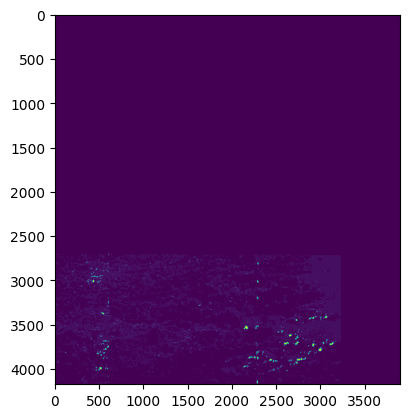

In [25]:
# Load a new multispectral image
# Control resources with htop.  There is memory limitation based on k, bands, rows and columns.


ds, featuresNewImage = raster.read('/home/janaya/Downloads/NewFeature16bit_27.tif')

outFile = 'predicted_231226_27.tif'
# Generate image chips in the back-end, the size of the file can be different but it might run out of memory. 
# And it does.  Adjust the number of bands, originally 6 bands (b1,b2,b3,b4,b5,b6), see feat variable.
def CNNdataGenerator(mxBands, kSize):
    mxBands = mxBands / 255.0
    nBands, rows, cols = mxBands.shape
    margin = math.floor(kSize/2)
    mxBands = np.pad(mxBands, margin, mode='constant')[margin:-margin, :, :]

    features = np.empty((rows*cols, kSize, kSize, nBands))

    n = 0
    for row in range(margin, rows+margin):
        for col in range(margin, cols+margin):
            feat = mxBands[:, row-margin:row+margin+1, col-margin:col+margin+1]

            b1, b2 = feat
            feat = np.dstack((b1, b2))

            features[n, :, :, :] = feat
            n += 1

    return(features)


# Call the function to generate features tensor
print('Values in input features, min: %d & max: %d' % (features.min(), features.max()))
new_features = CNNdataGenerator(featuresNewImage, kSize=9) # see imageChipsFromFile
print('Shape of the new features', new_features.shape)

# Predict new data and export the probability raster
newPredicted = model.predict(new_features)
newPredicted = newPredicted[:,1]

prediction = np.reshape(newPredicted, (ds.RasterYSize, ds.RasterXSize))
raster.export(prediction, ds, filename=outFile, dtype='float')

plt.imshow(prediction)
plt.show()